# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# print(train)
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = train['sizes'][0]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [29 30]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
import csv

sign_name = []

#read signnames.csv
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sign_name.append(row['SignName'])
        
print(sign_name)

def get_sign_name(cls):
    return sign_name[cls]

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vechiles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vechiles over 3.5 metric tons']


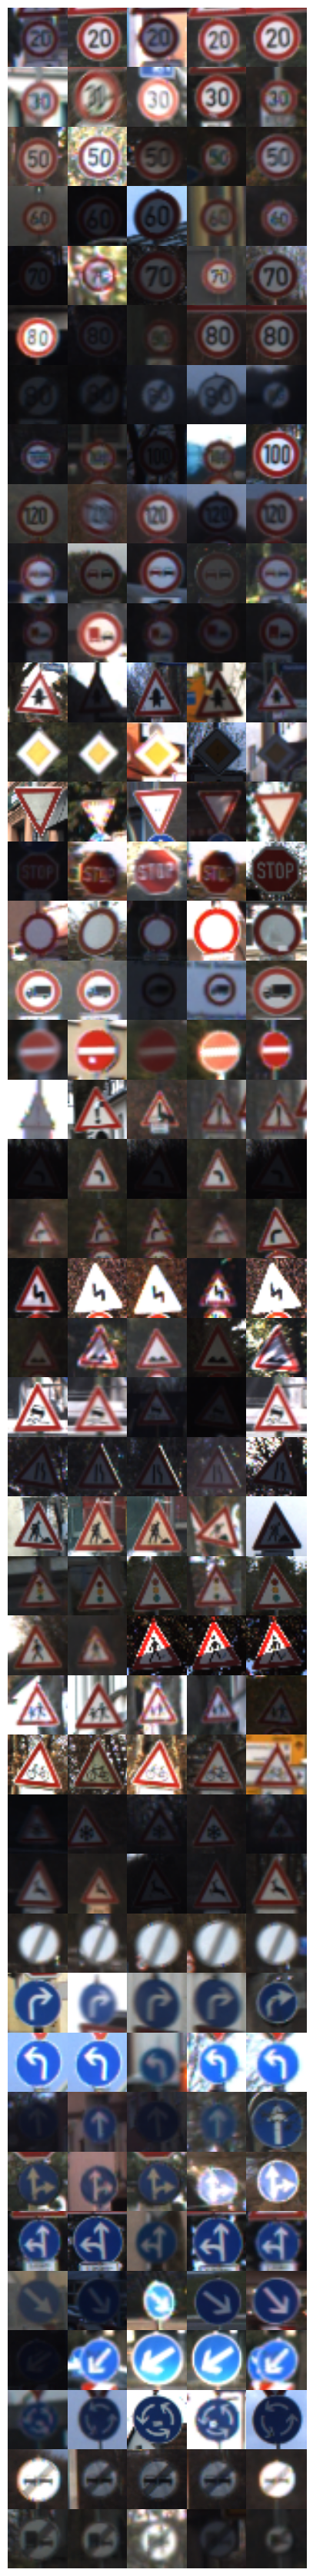

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
import numpy as np
import random

# plt.figure()
# plt.imshow(X_train[100])
# plt.imshow(X_train[200])
# plt.show()


## Inspired by John Chen's comment in the forums

sample_size = 5 #five images per class label
n_labels = 43
count = 0 #book keeping for plots
fig = plt.figure(figsize=(sample_size, n_labels))
grid = gridspec.GridSpec(n_labels, sample_size, wspace=0.0, hspace=0.0)

# y_test_processed_cls = np.asarray([np.asscalar(e.nonzero()[0]) for e in y_test_processed])
# print(y_test_processed_cls)

# print(X_test[:100])
# print(X_test_processed[:100])

for i in range(n_labels): #labelset_pbar:
    ind = y_test == i
    subset_x = X_test[ind,] #get all images that belong to class i

#     ind = y_test_processed_cls == i
#     subset_x = X_test_processed[ind,] #get all images that belong to class 

    for x in range(sample_size):
        img = random.choice(subset_x) #randomly pick on image from class i
        ax = plt.Subplot(fig, grid[count])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img, cmap='gray')
        fig.add_subplot(ax)
        count +=1

    # hide the borders
    if i == (n_labels-1):
        all_axes = fig.get_axes()
        for ax in all_axes:
            for sp in ax.spines.values():
                sp.set_visible(False)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import hashlib
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
from zipfile import ZipFile
import tensorflow as tf
import cv2


print('All modules imported.')


########################### Preprocessing ###################################

def normalize_greyscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )


height = 32
width = 32

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(len(X_val))

def preprocess_single(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray,(width, height), interpolation = cv2.INTER_CUBIC)
    normalized = normalize_greyscale(resized)
    return normalized

def preprocess(x, y):
    sample_size = len(x)
    sample_x_train = []
    sample_y_train = []

    for i in range(sample_size):
        sample_x_train.append(preprocess_single(x[i]))

    lb = LabelBinarizer()
    sample_y_train = lb.fit_transform(y)[:sample_size]
    
    return np.asarray(sample_x_train), np.asarray(sample_y_train)
    
X_train_processed, y_train_processed = preprocess(X_train_new, y_train_new)
X_val_processed, y_val_processed = preprocess(X_val, y_val)
X_test_processed, y_test_processed = preprocess(X_test, y_test)

#print("sample x:", sample_x_train[0:2])
print("X_train_processed length: {}".format(len(X_train_processed)))
print("y_train_processed length: {}".format(len(y_train_processed)))
print("X_val_processed length: {}".format(len(X_val_processed)))
print("y_val_processed length: {}".format(len(y_val_processed)))
print("X_test_processed length: {}".format(len(X_test_processed)))
print("y_test_processed length: {}".format(len(y_test_processed)))

All modules imported.
9803
X_train_processed length: 29406
y_train_processed length: 29406
X_val_processed length: 9803
y_val_processed length: 9803
X_test_processed length: 12630
y_test_processed length: 12630


In [7]:
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

def weights(n_features, n_labels):
    return tf.Variable(tf.truncated_normal((n_features, n_labels)))

def biases(n_labels):
    return tf.Variable(tf.zeros(n_labels))

def linear(input, w, b):
    return tf.add(tf.matmul(input, w), b)

def single_layer(x):
    weights = tf.Variable(tf.truncated_normal((n_features, n_classes), stddev=0.05))
    biases = tf.Variable(tf.zeros(n_classes))
    logits = linear(x, weights, biases)
    return logits

def two_layer(x):
    n_hidden_layer = 256 

    # Store layers weight & bias
    weights = {
        'hidden_layer': tf.Variable(tf.random_normal([n_features, n_hidden_layer], stddev=0.01)),
        'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes], stddev=0.01))
    }
    biases = {
        'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
        'out': tf.Variable(tf.random_normal([n_classes]))
    }

    x_flat = tf.reshape(x, [-1, n_features])

    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
    layer_1 = tf.nn.relu(layer_1)
    # Output layer with linear activation
    logits = tf.matmul(layer_1, weights['out']) + biases['out']
    return logits

def LeNet(x):
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    x = tf.reshape(x, (-1, 32, 32, 1))
    # Pad 0s to 36x36. Centers the digit further.
    # Add 2 rows/columns on each side for height and width dimensions.
    x = tf.pad(x, [[0, 0], [2, 2], [2, 2], [0, 0]], mode="CONSTANT")

    # Hyperparameters
    mu = 0
    sigma = 0.05

    # SOLUTION: Convolution Layer 1. Input = 36x36x3. Output = 32x32x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation 1.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling Layer 1. Input = 32x32x6. Output = 16x16x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Convolution Layer 2. Output = 12x12x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation 2.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling Layer 2. Input = 12x12x16. Output = 6x6x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten Layer.
    fc1 = flatten(conv2)
    fc1_shape = (fc1.get_shape().as_list()[-1], 512)

    # SOLUTION: Fully Connected Layer 1. Input = 6x6x16. Output = 512.
    fc1_W     = tf.Variable(tf.truncated_normal(shape=(fc1_shape), mean = mu, stddev = sigma))
    fc1_b     = tf.Variable(tf.zeros(512))
    fc1       = tf.matmul(fc1, fc1_W) + fc1_b

    # SOLUTION: Activation 3.
    fc1 = tf.nn.relu(fc1)

    # SOLUTION: Fully Connected Layer 2. Input = 512. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    print(logits)

    return logits


def MyNet(x):
    x = tf.reshape(x, (-1, 32, 32, 1))
    # Pad 0s to 36x36. Centers the digit further.
    # Add 2 rows/columns on each side for height and width dimensions.
    #x = tf.pad(x, [[0, 0], [2, 2], [2, 2], [0, 0]], mode="CONSTANT")
    
    mu = 0
    sigma = 0.05
    
    # SOLUTION: Convolution Layer 1. Input = 36x36x3. Output = 32x32x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 64), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    
    # SOLUTION: Activation 1.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Flatten Layer.
    fc1 = flatten(conv1)
    fc1_shape = (fc1.get_shape().as_list()[-1], 512)
    
    # SOLUTION: Fully Connected Layer 1. Input = 5x5x16. Output = 120.
    fc1_W     = tf.Variable(tf.truncated_normal(shape=(fc1_shape), mean = mu, stddev = sigma))
    fc1_b     = tf.Variable(tf.zeros(512))
    fc1       = tf.matmul(fc1, fc1_W) + fc1_b

    # SOLUTION: Activation 3.
    fc1 = tf.nn.relu(fc1)
    
    fc2_shape = (fc1.get_shape().as_list()[-1], 512)
    fc2_W     = tf.Variable(tf.truncated_normal(shape=(fc2_shape), mean = mu, stddev = sigma))
    fc2_b     = tf.Variable(tf.zeros(512))
    fc2       = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation 3.
    fc2 = tf.nn.relu(fc2)
    

    # SOLUTION: Fully Connected Layer 2. Input = 120. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits
    
# Number of features (32*32 image is 1024 features)
n_features = 1024
# # Number of labels
n_classes = 43

# tf.reset_default_graph()

features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

## WHERE THE MAGIC HAPPENS ##
#logits = single_layer(features)
#logits = two_layer(features)
logits = LeNet(features)
#logits = MyNet(features)

EPOCHS = 150
BATCH_SIZE = 500

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels))
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def eval_data(x, y):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    # If dataset.num_examples is not divisible by BATCH_SIZE
    # the remainder will be discarded.
    # Ex: If BATCH_SIZE is 64 and training set has 55000 examples
    # steps_per_epoch = 55000 // 64 = 859
    # num_examples = 859 * 64 = 54976
    #
    # So in that case we go over 54976 examples instead of 55000.
    steps_per_epoch = len(x) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    current_start = 0
    for step in range(steps_per_epoch):
        batch_x = x[current_start:current_start + BATCH_SIZE]
        batch_y = y[current_start:current_start + BATCH_SIZE]
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={features: batch_x, labels: batch_y})
        total_acc += (acc * len(batch_x))
        total_loss += (loss * len(batch_x))
        current_start += BATCH_SIZE
    return total_loss/num_examples, total_acc/num_examples


Tensor("add_7:0", shape=(?, 43), dtype=float32)


In [49]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    steps_per_epoch = len(X_train_processed) // BATCH_SIZE   # mnist.train.num_examples // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE

    # Train model
    for i in range(EPOCHS):
        X_train_processed, y_train_processed = shuffle(X_train_processed, y_train_processed)
        current_start = 0
        for step in range(steps_per_epoch):
            batch_x = X_train_processed[current_start:current_start + BATCH_SIZE]
            batch_y = y_train_processed[current_start:current_start + BATCH_SIZE]
            loss = sess.run(train_op, feed_dict={features: batch_x, labels: batch_y})

        train_loss, train_acc = eval_data(X_train_processed, y_train_processed)
        val_loss, val_acc = eval_data(X_val_processed, y_val_processed)
 
        print("EPOCH {}: training loss = {:.3f}, acc = {:.3f}, validation loss = {:.3f}, acc = {:.3f}".format(i+1, train_loss, train_acc, val_loss, val_acc))
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
        
    model_path = 'C:\\Users\\mathi\\repo\\traffic-signs\\lenet8'
    saver.save(sess, model_path)
    print('Model Saved: "{}"'.format(model_path))
 
    test_loss, test_acc = eval_data(X_test_processed, y_test_processed)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))
    print()

EPOCH 1: training loss = 2.918, acc = 0.260, validation loss = 2.932, acc = 0.261
EPOCH 2: training loss = 2.007, acc = 0.519, validation loss = 2.047, acc = 0.515
EPOCH 3: training loss = 1.656, acc = 0.613, validation loss = 1.670, acc = 0.606
EPOCH 4: training loss = 1.664, acc = 0.663, validation loss = 1.710, acc = 0.649
EPOCH 5: training loss = 1.283, acc = 0.705, validation loss = 1.299, acc = 0.692
EPOCH 6: training loss = 1.323, acc = 0.721, validation loss = 1.345, acc = 0.711
EPOCH 7: training loss = 1.223, acc = 0.746, validation loss = 1.260, acc = 0.743
EPOCH 8: training loss = 1.206, acc = 0.766, validation loss = 1.279, acc = 0.753
EPOCH 9: training loss = 1.293, acc = 0.756, validation loss = 1.342, acc = 0.746
EPOCH 10: training loss = 1.188, acc = 0.784, validation loss = 1.233, acc = 0.781
EPOCH 11: training loss = 1.050, acc = 0.800, validation loss = 1.077, acc = 0.797
EPOCH 12: training loss = 1.095, acc = 0.801, validation loss = 1.122, acc = 0.793
EPOCH 13: tra

# Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

First, I use OpenCV to convert the images to grayscale. According to [1], grayscale images work just as well, if not better, than color images for traffic sign classification. Also, this will speed up training time since we now have only 1 channel to process instead of 3.
Next, I resize all the images to 32x32 to make sure that later processing does not have any size incompatibility.
Finally, I normalize the grayscale images to have values between 0.1 and 0.9 using min-max normalization.



[1] Traffic sign recognition with multi-scale convolutional networks
P Sermanet, Y LeCun - Neural Networks (IJCNN), The 2011 International Joint …, 2011

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I split the training data into training and validation data to a 2:1 ratio and use the original test set as my test set.
Most images are used as training set, which will provide a good model to validate and test later.

Training set size: 26270,
Validation set size: 12939,
Test set size: 12630


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture is very similar to the LeNet architecture.
The sizes are calculated using the formula:
new_height = (input_height - filter_height + 2 * P)/S + 1
new_width = (input_width - filter_width + 2 * P)/S + 1
where P is padding size and S is stride size.

#1: convolution layer 1: input = 36x36x3, output = 32x32x6, stride 1, padding valid
#2: max pooling layer 1: input = 32x32x6, output = 16x16x6, stride 2, padding valid.
#3: convolution layer 2: input = 16x16x6, output = 12x12x16. stride 1, padding valid
#4: max pooling layer 2: input = 12x12x16, output = 6x6x16, stride 2, padding valid
#5: fully connected layer 1: input = 6x6x16, output = 512
#6: fully connected layer 2: input = 512, output = 43

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I use the AdamOptimizer with the default learning rate of 0.001.
The batch size is 500. This value is quite large but it allows me to train many examples at a time while it still fits into the memory of my computer (16 GB).
I ran it over 500 epochs but it stays relatively constant after about 200 epochs.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

A big part of implementing a solution is to build the pipeline from loading, preprocessing, training, validating to testing.
Therefore, I first started off with a simple linear model, which allowed me to find easy bugs such as size mismatch errors. Then, using a deep network with only fully connected layers helped me find more bugs in accuracy evaluation functions which gave me unusually low accuracies. Finally, using the LeNet archtecture and tweaking the parameters and sizes was the key step to get high accuracies for the solution. Since LeNet has been validated on the very similar MNIST dataset, it is a great starting point for a more complex architecture to solve the traffic sign classification problem.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

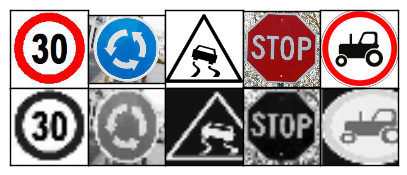

In [50]:

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

img1=mpimg.imread('test-signs/30.jpg')
img2=mpimg.imread('test-signs/roundabout2.jpg')
img3=mpimg.imread('test-signs/slippery.png')
img4=mpimg.imread('test-signs/stop4.jpg')
img5=mpimg.imread('test-signs/tractor.png')
# img=mpimg.imread('GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/00021.ppm')

images = [img1, img2, img3, img4, img5]

processed_imgs = np.array([preprocess_single(x) for x in images])
# print(processed_imgs[0][15])

num_imgs = len(images)
fig = plt.figure(figsize=(num_imgs, 2))
grid = gridspec.GridSpec(2, num_imgs, wspace=0.0, hspace=0.0)

count = 0
for img in images:
    ax = plt.Subplot(fig, grid[count])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img, cmap='gray')
    fig.add_subplot(ax)
    count +=1

for img in processed_imgs:
    ax = plt.Subplot(fig, grid[count])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img, cmap='gray')
    fig.add_subplot(ax)
    count +=1
    
# imgplot = plt.imshow(processed_imgs[1], cmap='gray')
plt.show()



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The slippery road and tractor signs were not in the training dataset, therefore we expect them to be classified as some other signs with low confidence.

In [51]:
softmax_probs = tf.nn.softmax(logits)

sess = tf.Session()
new_saver = tf.train.import_meta_graph('lenet8.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./'))
# all_vars = tf.trainable_variables()
# for v in all_vars:
#     print(v.name, v.eval)
    
predictions = sess.run(softmax_probs, feed_dict={features: processed_imgs})

test_loss, test_acc = eval_data(X_test_processed, y_test_processed)

print(predictions)

for pred in predictions:
    cls = np.argmax(pred)
    name = get_sign_name(cls)
    print(cls, name, pred[cls])

print(test_acc)

[[  1.02632092e-25   6.66634142e-01   7.89955209e-16   1.48114921e-30
    0.00000000e+00   1.81050894e-24   3.33365858e-01   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.04638542e-29
    2.94865612e-35   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.98767181e-40   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.96099625e-18   3.79395954e-40   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    5.10072641e-42   0.00000000e+00   2.92432603e-35]
 [  5.52432349e-28   6.91450586e-09   5.11997976e-14   9.31049062e-19
    3.92558979e-35   8.40161475e-18   7.21758468e-15   3.70826756e-17
    1.40129846e-45   6.47616205e-33   2.65734180e-28   1.16200006e-07
    1.33734623e-08   1.96181785e-44 

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model is 60% accurate on the test images. However, the two failing signs were not in the training set, so they were expected to be recognized as some other signs. The other 3 test signs are recognized correctly with high confidence.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [52]:
sess = tf.Session()
top_preds = sess.run(tf.nn.top_k(tf.constant(predictions), k=3))
for indices in top_preds.indices:
    print("The top predictions are: ")
    for ind in indices:
        print(ind, get_sign_name(ind))
    print()

The top predictions are: 
1 Speed limit (30km/h)
6 End of speed limit (80km/h)
2 Speed limit (50km/h)

The top predictions are: 
40 Roundabout mandatory
11 Right-of-way at the next intersection
12 Priority road

The top predictions are: 
3 Speed limit (60km/h)
18 General caution
31 Wild animals crossing

The top predictions are: 
14 Stop
38 Keep right
34 Turn left ahead

The top predictions are: 
3 Speed limit (60km/h)
18 General caution
31 Wild animals crossing



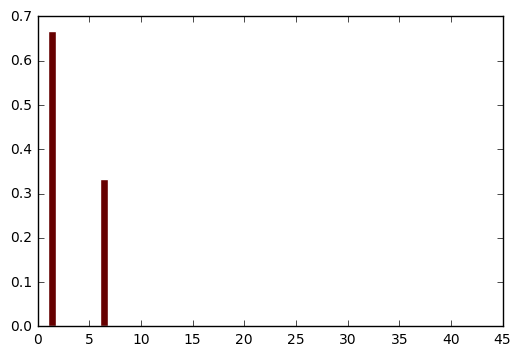

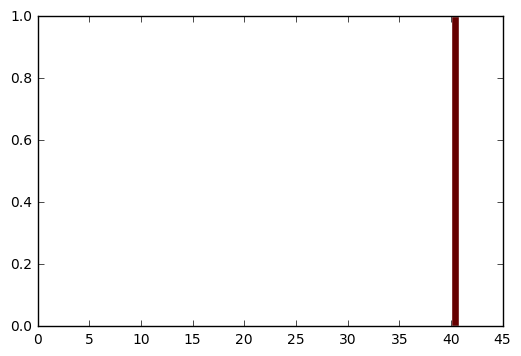

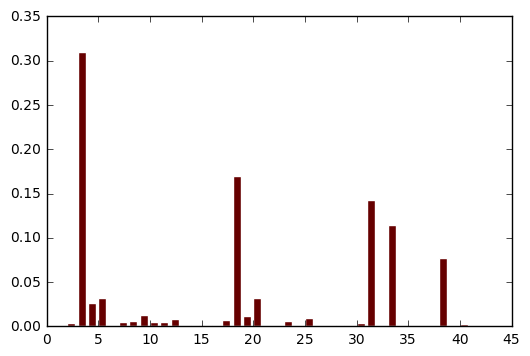

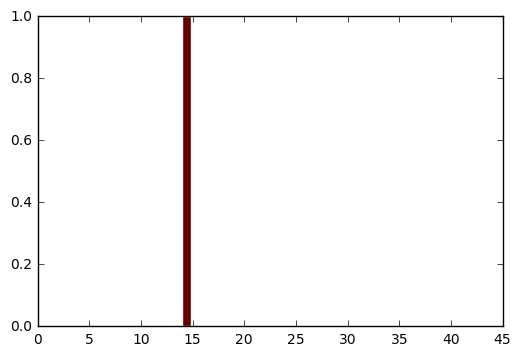

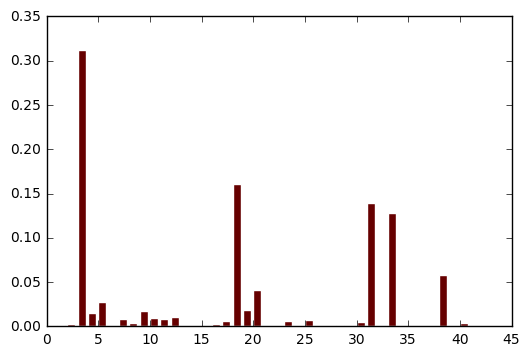

In [54]:
X = np.arange(n_classes)

for pred in predictions:
    plt.bar(X, pred, facecolor='#660000', edgecolor='white')
    plt.show()

The results look reasonable. For the signs not belonging to the training set (3rd and 5th), the predictions are basically random. However, for the correct predictions, we can get a hint of how the model is trained from the top 3 predictions. The first sign of 30km/h speed limit, for example, has it's second and third largest probabilities as two signs having 80km/h on them, which is a very similar number to the 30 in the real sign.

In terms of certainty, the roundabout and stop sign have near perfect certainty, which means that the model is able to distinguish them well from the other signs in the dataset. The 30km/h sign is 67% certain of its correct prediction, but is 31% inclined towards the 80km/h speed sign. As discussed in the above paragraph, this can be a result of the two signs being very similar. For the two signs not in the training set, we can clearly see that all probabilities are less than 35% and many non-zero values can be seen directly on the plots, which suggests that the predicted results cannot be trusted.

